In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/mtcars.csv")

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [18]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [36]:
sample=df['carb']
sample.head()

0    4
1    4
2    1
3    1
4    2
Name: carb, dtype: int64

In [37]:
sample_list=sample.tolist()
sample_list

[4,
 4,
 1,
 1,
 2,
 1,
 4,
 2,
 2,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 1,
 2,
 1,
 1,
 2,
 2,
 4,
 2,
 1,
 2,
 2,
 4,
 6,
 8,
 2]

In [40]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_zscore(sample_list)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [8]


Text(0.5, 0, 'Sample')

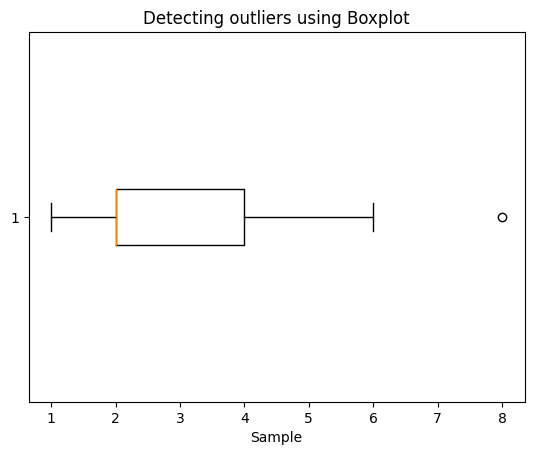

In [41]:
plt.boxplot(sample_list, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [42]:
data = sorted(sample_list)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
out=[]
for item in data.copy():
    if (item<lwr_bound or item>upr_bound):
        out.append(item)
        data.remove(item)

print("Outliers: ",out)

Outliers:  [8]


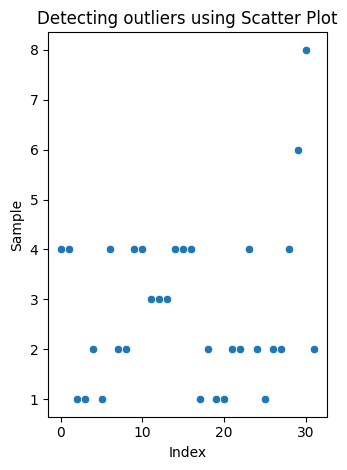

In [45]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=range(len(sample_list)), y=sample_list)
plt.title("Detecting outliers using Scatter Plot")
plt.xlabel('Index')
plt.ylabel('Sample')

plt.tight_layout()
plt.show()

In [67]:
data = sorted(sample_list)
print("Before Removing outlier:\n",data)
a = np.array(data)
for i in sample_outliers:
    a = np.delete(a, np.where(a == i))  # Removing the outlier from 'a'
print("After removing outliers:\n",a)


Before Removing outlier:
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 8]
After removing outliers:
 [1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4 4 4 4 6]


In [66]:
data = sorted(sample_list)
print("Before Removing outlier\n",data)
for item in data.copy():
    if (item<lwr_bound or item>upr_bound):
        data.remove(item)

print("Sorted Data after removing outlier by using IQR Score\n",data) 

Before Removing outlier
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 8]
Sorted Data after removing outlier by using IQR Score
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6]


In [69]:
data=sorted(sample_list)
median = np.median(data)
median

2.0

In [74]:
data = sorted(sample_list)
median = np.median(data)
median

2.0

In [75]:
c = np.where(np.isin(data, sample_outliers), median, data)

print("Sorted Data:\n", data)
print("Data After removing outliers and imputing with median:\n", c)

Sorted Data:
 [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 8]
Data After removing outliers and imputing with median:
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 6. 2.]
